In [1]:
import pandas as pd
import numpy as np
from os.path import join
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math

ROOT_DIR = '/Users/louis/Projects/crop-forecasting/'

In [2]:
def encode(df):
    df['Date of Harvest'] = pd.to_datetime(df['Date of Harvest']).dt.month
    df['Date of Harvest'] = MinMaxScaler((0, 2 * math.pi)).fit_transform(df['Date of Harvest'].to_numpy().reshape(-1, 1)).reshape(-1)
    df['Sin Date of Harvest'] = np.sin(df['Date of Harvest'])
    df['Cos Date of Harvest'] = np.cos(df['Date of Harvest'])
    df.drop(columns=['Date of Harvest'], inplace=True)
    
    df = df.replace('D', 2).replace('T', 3)
    df = pd.get_dummies(df, columns=['District', 'Season(SA = Summer Autumn, WS = Winter Spring)'], drop_first=True)
    
    return df

In [3]:
train_df = pd.read_csv(join(ROOT_DIR, 'data', 'interim', 'train_enriched.csv'), index_col=0)
test_df = pd.read_csv(join(ROOT_DIR, 'data', 'interim', 'test_enriched.csv'), index_col=0)

train_df = encode(train_df)
test_df = encode(test_df)

scaler = StandardScaler()

train_df = train_df.drop(columns=['Rice Yield (kg/ha)'])
train_df = pd.get_dummies(train_df)
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)

test_df = test_df.drop(columns=['ID No', 'Predicted Rice Yield (kg/ha)'])
test_df = pd.get_dummies(test_df)
test_df = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

/var/folders/7t/wmv4003x5wn3_h0v2h8xdccc0000gn/T/ipykernel_53002/2536646665.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date of Harvest'] = pd.to_datetime(df['Date of Harvest']).dt.month
/var/folders/7t/wmv4003x5wn3_h0v2h8xdccc0000gn/T/ipykernel_53002/2536646665.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date of Harvest'] = pd.to_datetime(df['Date of Harvest']).dt.month


<Axes: ylabel='Density'>

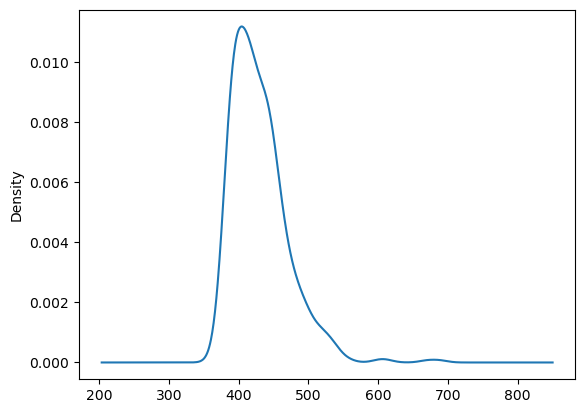

In [4]:
def compute_mean_dist(x, test_df):
    dist = 0
    for i, row in test_df.iterrows():
        dist += np.linalg.norm(x.to_numpy() - row.to_numpy())
        
    return dist


train_df['Distance'] = train_df.apply(lambda x: compute_mean_dist(x, test_df), axis='columns')
train_df = train_df.sort_values('Distance')

train_df.Distance.plot.kde()

In [5]:
len(train_df)

557

In [6]:
train_df = train_df[train_df.Distance <= train_df.Distance.quantile(0.5)]

print(len(train_df))

train_df.index.tolist()

279


[6,
 241,
 255,
 257,
 8,
 17,
 15,
 256,
 237,
 246,
 65,
 1,
 0,
 222,
 243,
 223,
 191,
 233,
 252,
 59,
 194,
 466,
 231,
 221,
 182,
 229,
 224,
 193,
 469,
 234,
 180,
 242,
 260,
 232,
 66,
 230,
 79,
 238,
 196,
 219,
 421,
 467,
 12,
 244,
 179,
 419,
 68,
 351,
 181,
 208,
 420,
 76,
 175,
 359,
 23,
 353,
 333,
 22,
 235,
 245,
 176,
 358,
 192,
 63,
 335,
 82,
 425,
 200,
 62,
 431,
 352,
 346,
 371,
 284,
 355,
 213,
 373,
 423,
 434,
 279,
 218,
 418,
 10,
 334,
 160,
 60,
 7,
 297,
 90,
 58,
 55,
 422,
 350,
 367,
 89,
 57,
 74,
 251,
 206,
 339,
 249,
 357,
 299,
 360,
 328,
 83,
 156,
 340,
 342,
 426,
 344,
 377,
 347,
 56,
 228,
 158,
 375,
 303,
 301,
 365,
 441,
 99,
 111,
 150,
 374,
 435,
 227,
 197,
 101,
 250,
 296,
 440,
 415,
 248,
 318,
 69,
 436,
 104,
 61,
 71,
 438,
 300,
 163,
 75,
 167,
 178,
 319,
 72,
 205,
 327,
 405,
 332,
 215,
 331,
 363,
 274,
 324,
 329,
 92,
 199,
 442,
 370,
 439,
 427,
 506,
 507,
 283,
 152,
 80,
 164,
 154,
 361,
 458,
 195